This notebook recreates neural network algorithms from scratch

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline 
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

### Read the csv files from path

In [2]:
def load_data(filepath):
    df = pd.read_csv(filepath,names = [i for i in range(1,786)]) #read the csv files from path
    X=[]
    Y=[]
    df_N=df.drop([785],axis=1)
    X=df_N.to_numpy()
    Y=df[785].to_numpy()
    return X,Y

In [3]:
XX,YY = load_data('F:/Data Science/NN/mnist_train.csv')
# Training Samples
X=XX[:8000];Y=YY[:8000]
# Test Samples
X_test = XX[8000:];Y_test = YY[8000:]

The above function will give two arrays, one is pixel values and other target values.
I splitted the array in to two, first 8000 for training my neural network and last 2000 for testing my neural network

### Activation Functions

In [4]:
#Softmax Activation Function
def softmax(X):
    expX = np.exp(X-np.max(X,axis=1,keepdims=True))
    return expX / np.sum(expX, axis=1, keepdims=True) 

#Sigmoid Activation Function
def sigmoid(X): 
    return 1/(1+np.exp(-X))

#Relu Activation Function
def relu(X):
    X[X<=0]=0
    return X

#Derivative of Relu Activation Function
def relu_der(x):
    x[x<=0]=0
    x[x>0]=1 
    return x


#Tanh Activation Function
def tanh(X):
    return np.tanh(X)

#Derivative of Sigmoid Activation Function
def sigmoid_der(X):
    return sigmoid(X)*(1-sigmoid(X))

### Neural Network algorithm with  zero hidden layer neural network

In [5]:
in_layer         = 784       # Input Layer
out_layer        = 10        # Output Layer
lr_zero          = 1         # Learning Rate
iteration_zero   = 1000      # No of Iterations
num_examples     = len(X)    # No of Input training Samples

In [6]:
#Initial Weights and Bias(Using Random)
def weight_bias_zero_layer(in_layer,out_layer):
    w=np.random.random((in_layer,out_layer))
    b=np.zeros((1,out_layer)) 
    return (w,b)

In [7]:
#Updating Weights and Bias 
def update_weights_perceptron(X, Y, weights_zero, bias_zero, lr_zero):
    X = (X/np.max(X))  # Normalize the output with max as zero for better numerical stability of exponential
    w = weights_zero #(784,8000)  #Initial Weights which we generated randomly
    b = bias_zero    #(1,10)      #Initial bias which an array of zeros
    print("Neural Network Algorithm  Zero Hidden Layers")
    print("Epochs : {}  Learning Rate : {}".format(iteration_zero,lr_zero))
    print("Weights and Bias are updating .....")
    print("   Loss (Cross-Entropy)")
    for i in range(iteration_zero):
        #Forward pass:
            probs = softmax(np.dot(X,w)+b)    # Apply Softmax activation
            #Probs will be a array of dimension (1,out_layer) 
        #Loss calculation:
            cross_er = -np.log(probs[np.arange(num_examples), Y]) #Cross-Entropy
            loss = np.sum(cross_er)/num_examples        #Average loss in the training
            if(i%200==0):
                print("\t {}th Iteration: {}".format(i,loss))
        #backward pass:
            delta = probs.copy()
            delta[range(num_examples), Y] -= 1
            delta/=num_examples
            
            dw = np.dot(X.T,delta)
            db = np.sum(delta, axis=0, keepdims=True)

            w += -lr_zero*dw #Updated Weights 
            b += -lr_zero*db #Updated bias
    print("Final train Loss {}".format(loss))
    updated_weights= w
    updated_bias   = b
    return (updated_weights, updated_bias)

In [8]:
#Initial Weights and Bias
weights_zero, bias_zero = weight_bias_zero_layer(in_layer,out_layer)
#Updating Weights and bias
weights_zero_updated,bias_zero_updated =  update_weights_perceptron(X, Y, weights_zero, bias_zero, lr_zero)

Neural Network Algorithm  Zero Hidden Layers
Epochs : 1000  Learning Rate : 1
Weights and Bias are updating .....
   Loss (Cross-Entropy)
	 0th Iteration: 4.450610328460305
	 200th Iteration: 0.28238707433409266
	 400th Iteration: 0.2370356923769022
	 600th Iteration: 0.21354490585689706
	 800th Iteration: 0.19768873890747807
Final train Loss 0.1857768211566185


Predicted Y : 0
Target


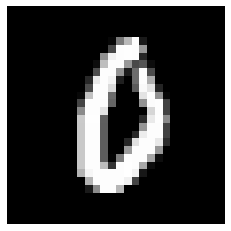

In [9]:
#Testing the Neural Network using last 2000 samples
def predict_perceptron(Q,weights_zero,bias_zero):
    Q = (Q/255.0)
    w = weights_zero
    b = bias_zero
    z=np.dot(Q,w)+b
    predicted = softmax(z/np.max(z))
    print("Predicted Y : {}" .format(np.argmax(predicted)))
    print("Target")
    plt.imshow(np.array(Q.reshape(28,28)),cmap='gray')
    plt.axis("off")
    plt.show()
predict_perceptron(X_test[147],weights_zero_updated,bias_zero_updated)

In [10]:
#Accuracy of Neural Network using last 2000 samples
def accuracy_perceptron(Q,weights_zero,bias_zero):
    Q = (Q/255.0)
    w = weights_zero
    b = bias_zero
    z=np.dot(Q,w)+b
    predicted = softmax(z/np.max(z)) 
    Y_p = np.argmax(predicted,axis=1)
    correct = 0
    for i in range(len(Q)):
        if Y_p[i]==Y_test[i]:
            correct =correct+1
        else:
            continue
    print("Correctly labeled (Out of {} Samples) : {}".format(len(X_test),correct))  
    print(" Accuracy : {} ".format(correct/len(Q)*100))
accuracy_perceptron(X_test,weights_zero,bias_zero)

Correctly labeled (Out of 2000 Samples) : 1799
 Accuracy : 89.95 


# Problem 3

### Neural Network Algorithm One Hidden Layer

In [11]:
in_layer         = 784     # Input Layer
hid_layer        = 10      # Hidden Layer
out_layer        = 10      # Output Layer
lr_single        = 5     # Learning Rate
iteration_single = 1000    # No of Iterations
num_examples     = len(X)  # No of Input training Samples

In [12]:
#Initial Weights and Bias
def weight_bias_single_layer(in_layer,hid_layer,out_layer):
        w1=np.random.randn(in_layer,hid_layer)*0.01   #weights 1 (784,10)
        w2=np.random.randn(hid_layer,out_layer)*0.01  #weights 2 (10 , 10)
        weights = [w1,w2]
        b1=np.zeros((1,hid_layer))  #bias 1  (1,10)
        b2=np.zeros((1,out_layer))  #bias 2  (1,10)
        bias = [b1,b2]
        return (weights,bias)

In [13]:
#Updating Weights and Bias 
def update_weights_single_layer(X, Y, weights_single, bias_single, lr_single):
    X= X/255.0   # Normalize the output with max as zero for better numerical stability of exponential
    [w1,w2] = weights_single #Initial Weights 
    [b1,b2] = bias_single    #Initial Bias
    print("Neural Network Algorithm Single Hidden Layer")
    print("Epochs : {}  Learning Rate : {}".format(iteration_single,lr_single))
    print("Weights and Bias ara updating .....")
    print("   Loss (Cross-Entropy)")
    for i in range(iteration_single):
    #Forward pass:
        z1 = np.dot(X,w1) + b1        
        A1 = sigmoid(z1)        # Apply sigmoid activation
        z2 = np.dot(A1,w2) + b2
        probs = softmax(z2)     # Apply Softmax activation
        
    #Loss calculation:
        cross_er = -np.log(probs[range(num_examples), Y])
        loss = np.sum(cross_er)/num_examples   
        
        if(i%200==0):
            print("\t {}th Iteration: {}".format(i,loss))
        
    #backward pass:
        delta = probs
        delta[range(num_examples), Y] -= 1
        delta/=num_examples

        dw2 =np.dot(A1.T,delta)
        db2 = np.sum(delta, axis=0, keepdims=True)

        dA1 = np.dot(probs,w2.T)
        dz1 = dA1*sigmoid(z1)*(1-sigmoid(z1))
        dw1 =np.dot(X.T,dz1)
        db1 =np.sum(dz1, axis=0, keepdims=True)
        
        w2 += -lr_single*dw2  #Upadate weight 1
        b2 += -lr_single*db2  #Upadate bias 1
        w1 += -lr_single*dw1  #Upadate weight 2
        b1 += -lr_single*db1  #Upadate bias 2
        
    print("Final train Loss {}".format(loss))
    updated_weights = [w1,w2]
    updated_bias    = [b1,b2]
    return (updated_weights,updated_bias) 

In [14]:
#Initial Weights and Bias
weights_single, bias_single = weight_bias_single_layer(in_layer,hid_layer,out_layer)
#Updating Weights and bias
weights_single_up,bias_single_up= update_weights_single_layer(X, Y, weights_single, bias_single, lr_single)

Neural Network Algorithm Single Hidden Layer
Epochs : 1000  Learning Rate : 5
Weights and Bias ara updating .....
   Loss (Cross-Entropy)
	 0th Iteration: 2.3030192073119706
	 200th Iteration: 0.20844752001612918
	 400th Iteration: 0.14980806230178584
	 600th Iteration: 0.18866395897006072
	 800th Iteration: 0.10158018020498936
Final train Loss 0.08581081153910483


Predicted: 8
Target


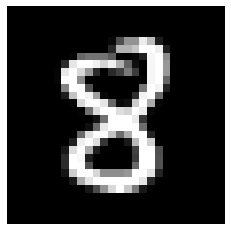

In [15]:
#Testing the Neural Network using last 2000 samples
def predict_single_layer(Q,weights_single_up,bias_single_up):
    [w1,w2] = weights_single_up
    [b1,b2] = bias_single_up
    Q = (Q/255.0)
    z1 = np.dot(Q,w1) + b1 # Apply sigmoid activation
    A1 = sigmoid(z1)
    z2 = np.dot(A1,w2) + b2
    predicted = softmax(z2)
    print("Predicted: {}" .format(np.argmax(predicted)))
    print("Target")
    plt.imshow(np.array(Q.reshape(28,28)),cmap='gray')
    plt.axis("off")
    plt.show()
predict_single_layer(X_test[132],weights_single_up,bias_single_up)

In [16]:
#Accuracy of Neural Network using last 2000 samples
def accuracy_single_layer(Q,weights_single,bias_single):
    Q = (Q/255.0)
    [w1,w2] = weights_single
    [b1,b2] = bias_single
    z1 = np.dot(Q,w1) + b1
    A1 = sigmoid(z1)
    z2 = np.dot(A1,w2) + b2
    predicted = softmax(z2)
    Y_p = np.argmax(predicted,axis=1)
    correct = 0
    for i in range(len(Q)):
        if Y_p[i]==Y_test[i]:
            correct =correct+1
        else:
            continue
    print("Correctly labeled (Out of {} Samples) : {}".format(len(X_test),correct))
    print(" Accuracy : {} ".format(correct/len(Q)*100))
accuracy_single_layer(X_test,weights_single,bias_single)

Correctly labeled (Out of 2000 Samples) : 1812
 Accuracy : 90.60000000000001 


# Problem 4

### Neural Network Algorithm Two Hidden Layers

In [17]:
in_layer         = 784        # Input Layer
hid_layer_1      = 10         # First Hidden Layer
hid_layer_2      = 10         # Second Hidden Layer
out_layer        = 10         # Output Layer
lr_double        = 5          # Learning Rate
iteration_double = 1000       # No of Iterations
num_examples = len(X)         # No of Input training Samples

In [18]:
#Initial Weights and Bias
def weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer):
        w1=np.random.randn(in_layer,hid_layer_1)*0.01     #weights 1 (784,10)
        w2=np.random.randn(hid_layer_1,hid_layer_2)*0.01  #weights 2 (10 , 10)
        w3=np.random.randn(hid_layer_2,out_layer)*0.01    #weights 3 (10 , 10)
        weights = [w1,w2,w3]
        b1=np.zeros((1,hid_layer_1))  #bias 1 (1,10)
        b2=np.zeros((1,hid_layer_2))  #bias 2 (1,10)
        b3=np.zeros((1,out_layer))    #bias 3 (1,10)
        bias = [b1,b2,b3]
        return (weights,bias)

In [19]:
#Updating Weights and Bias
def update_weights_double_layer(X, Y,weights_double,bias_double, lr_double):
    X= X/255.0    # Normalize the output with max as zero for better numerical stability of exponential
    [w1,w2,w3] = weights_double  #Input Weights
    [b1,b2,b3] = bias_double     #Input Bias
    print("Neural Network Algorithm  Two Hidden Layers")
    print("Epochs : {}  Learning Rate : {}".format(iteration_double,lr_double))
    print("Weights and Bias ara updating .....")
    print("   Loss (Cross-Entropy)")
    for i in range(iteration_double):
    #Forward pass:
        z1 = np.dot(X,w1) + b1   # Input Layer-- Hidden layer 1
        A1 = sigmoid(z1)         #Apply Sigmoid Activation
        z2 = np.dot(A1,w2) + b2  # Hidden layer 1-- Hidden layer 2
        A2 = sigmoid(z2)         #Apply Sigmoid Activation
        z3 = np.dot(A2,w3) + b3  # Hidden layer 2-- Out Layer
        probs = softmax(z3)      #Apply softmax Activation
        
    #Loss calculation:(Cross Entropy)
        cross_er = -np.log(probs[range(num_examples), Y])
        loss = np.sum(cross_er)/num_examples  #Average loss
        
        if(i%200==0):
            print("\t {}th Iteration: {}".format(i,loss))
            
    #Back Propagation
        delta = probs
        delta[range(num_examples), Y] -= 1
        delta/=num_examples
       
        dw3 =np.dot(A2.T,delta)
        db3 = np.sum(delta, axis=0, keepdims=True)

        dA2 = np.dot(probs,w3.T)
        dz2 = dA2*sigmoid(z2)*(1-sigmoid(z2))
        dw2 =np.dot(A1.T,dz2)
        db2 =np.sum(dz2, axis=0, keepdims=True)
        
        dA1 = np.dot(probs,w3.T)
        dz1 = dA1*sigmoid(z2)*(1-sigmoid(z2)) 
        dz11 = np.dot(dz1,w2.T)
        dz12 = dz11*sigmoid(z1)*(1-sigmoid(z1))
        dw1 =np.dot(X.T,dz12)
        db1 =np.sum(dz12, axis=0, keepdims=True)
        
        w3 += -lr_double*dw3  #Upadate weight 3
        b3 += -lr_double*db3  #Upadate bias 3
        w2 += -lr_double*dw2  #Upadate weight 2
        b2 += -lr_double*db2  #Upadate bias 2
        w1 += -lr_double*dw1  #Upadate weight 1
        b1 += -lr_double*db1  #Upadate bias 1
        
    print(" Final train Loss {}".format(loss))
    updated_weights = [w1,w2,w3]  #Updated Weights
    updated_bias    = [b1,b2,b3]  #Updated Bias
    return (updated_weights,updated_bias) 

In [20]:
#Initial Weights and Bias
weights_double, bias_double = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)
#Updating Weights and bias
updated_weights_double,updated_bias_double = update_weights_double_layer(X, Y,weights_double,bias_double, lr_double)

Neural Network Algorithm  Two Hidden Layers
Epochs : 1000  Learning Rate : 5
Weights and Bias ara updating .....
   Loss (Cross-Entropy)
	 0th Iteration: 2.3021626484327724
	 200th Iteration: 2.2195198826277465
	 400th Iteration: 0.6982211710364956
	 600th Iteration: 0.3875543066252159
	 800th Iteration: 0.2003410746140178
 Final train Loss 0.19266791745936512


Predicted Y : 4
Target Y :


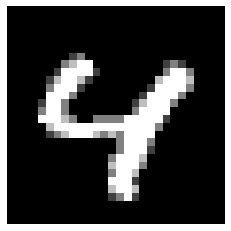

In [21]:
#Predicting a Output from X_test
def predict_double_layer(Q,weights,bias):
    [w1,w2,w3] = weights   
    [b1,b2,b3] = bias
    Q  = (Q/255.0)
    A1 = sigmoid(np.dot(Q,w1) + b1)
    A2 = sigmoid(np.dot(A1,w2) + b2)
    predicted = softmax(np.dot(A2,w3) + b3)
    print("Predicted Y : {}" .format(np.argmax(predicted)))
    print("Target Y :")
    plt.imshow(np.array(Q.reshape(28,28)),cmap='gray')
    plt.axis("off")
    plt.show()
predict_double_layer(X_test[11],updated_weights_double,updated_bias_double)

In [22]:
#Accuracy of Neural Network using last 2000 samples
def accuracy_double_layer(Q,weights,bias):
    Q = (Q/255.0)
    [w1,w2,w3] = weights 
    [b1,b2,b3] = bias
    A1 = sigmoid(np.dot(Q,w1) + b1)
    A2 = sigmoid(np.dot(A1,w2) + b2)
    predicted = softmax(np.dot(A2,w3) + b3)    
    Y_p = np.argmax(predicted,axis=1)
    correct = 0
    for i in range(len(Q)):
        if Y_p[i]==Y_test[i]:
            correct =correct+1
        else:
            continue
    print("Correctly labeled (Out of {} Samples) : {}".format(len(X_test),correct))  
    print(" Accuracy : {} ".format(correct/len(Q)*100))
accuracy_double_layer(X_test,updated_weights_double,updated_bias_double)

Correctly labeled (Out of 2000 Samples) : 1799
 Accuracy : 89.95 


#  Problem 5

### Neural Network different activations functions

In [23]:
# Activation Functions
def activate(activation,X):
    if activation == 'sigmoid':
        return sigmoid(X)
    if activation == 'tanh':
        return tanh(X)
    if activation == 'relu':
        return relu(X)

In [24]:
#Derivative of Active Functions
def der_active(activation,X):
    if activation == 'sigmoid':
        return sigmoid(X)*(1-sigmoid(X))
    if activation == 'tanh':
        return 1-(tanh(X))**2
    if activation == 'relu':
        return relu_der(X)

In [25]:
#Updating Weights and Bias
def update_weights_double_layer_act(X, Y,weights,bias,lr_act, activation):
    X= X/255.0   # Normalize the output with max as zero for better numerical stability of exponential
    [w1,w2,w3] = weights #Input Weights
    [b1,b2,b3] = bias    #Input bias
    print("Activation Function : {}".format(activation))
    print("Epochs : {}  Learning Rate : {}".format(iteration_act,lr_act))
    print("Weights and Bias are updating .....")
    for i in range(iteration_act):
    #Forward pass:
        z1 = np.dot(X,w1) + b1       # Input Layer-- Hidden layer 1
        A1 = activate(activation,z1) #Apply Activation (Sigmoid,Relu,Tanh)
        z2 = np.dot(A1,w2) + b2      # Hidden layer 1-- Hidden layer 2
        A2 = activate(activation,z2) #Apply Activation (Sigmoid,Relu,Tanh)
        z3 = np.dot(A2,w3) + b3      # Hidden layer 2-- Out Layer
        probs = softmax(z3)          #Apply softmax Activation
        
    #Loss calculation:(Cross Entropy)
        cross_er = -np.log(probs[range(num_examples), Y])
        loss = np.sum(cross_er)/num_examples   #Average Entropy
        
    #backward propagation
        delta = probs
        delta[range(num_examples), Y] -= 1
        delta/=num_examples

        dw3 =np.dot(A2.T,delta)
        db3 = np.sum(delta, axis=0, keepdims=True)

        dA2 = np.dot(probs,w3.T)
        dz2 = dA2*der_active(activation,sigmoid(z2))
        dw2 = np.dot(A1.T,dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        
        dA1  = np.dot(probs,w3.T)
        dz1  = dA1*der_active(activation,z2) 
        dz11 = np.dot(dz1,w2.T)
        dz12 = dz11*der_active(activation,z1)
        dw1  = np.dot(X.T,dz12)
        db1  = np.sum(dz12, axis=0, keepdims=True)
        
        w3 += -lr_act*dw3 #Upadate weight 3
        b3 += -lr_act*db3 #Upadate bias 3
        w2 += -lr_act*dw2 #Upadate weight 2
        b2 += -lr_act*db2 #Upadate bias 2
        w1 += -lr_act*dw1 #Upadate weight 3
        b1 += -lr_act*db1 #Upadate bias 1
    
        
    print("  Final train Loss {}".format(loss))
    updated_weights = [w1,w2,w3]
    updated_bias    = [b1,b2,b3]
    return (updated_weights,updated_bias)

In [26]:
#Accuracy of Neural Network using last 2000 samples
def accuracy_act(Q,updated_weights,updated_bias,activation):
    Q = (Q/255.0)
    [w1,w2,w3] = updated_weights
    [b1,b2,b3] = updated_bias
    A1 = activate(activation,np.dot(Q,w1) + b1)
    A2 = activate(activation,np.dot(A1,w2) + b2)
    predicted = softmax(np.dot(A2,w3) + b3)    
    Y_p = np.argmax(predicted,axis=1)
    correct = 0
    for i in range(len(Q)):
        if Y_p[i]==Y_test[i]:
            correct =correct+1
        else:
            continue
    print("Correctly labeled (Out of {} Samples) : {}".format(len(X_test),correct))  
    print(" Accuracy : {} ".format(correct/len(Q)*100))

### Sigmoid Activation Function

In [45]:
lr_act           = 3          # Learning Rate
iteration_act    = 2000       # No of Iterations
activation       = "sigmoid"  #Activation Function

In [46]:
#Initial Weights and Bias
weights_double, bias_double = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)

#Updating Weights and Bias
updated_weights,updated_bias = update_weights_double_layer_act(X, Y,weights_double, bias_double,lr_act, activation)

Activation Function : sigmoid
Epochs : 2000  Learning Rate : 3
Weights and Bias are updating .....
  Final train Loss 0.2625568497901256


### Tanh Activation Function

In [30]:
lr_act           = 1          # Learning Rate
iteration_act    = 1000       # No of Iterations
activation       = "tanh"     # Activation Function

In [31]:
#Initial Weights and Bias
weights_double, bias_double = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)

#Updating Weights and Bias
updated_weights,updated_bias = update_weights_double_layer_act(X, Y,weights_double, bias_double,lr_act, activation)

Activation Function : tanh
Epochs : 1000  Learning Rate : 1
Weights and Bias are updating .....
  Final train Loss 0.22832755138374364


In [32]:
#Accuracy of Neural Network Using Last 2000 samples
accuracy_act(X_test,updated_weights,updated_bias,activation)

Correctly labeled (Out of 2000 Samples) : 1727
 Accuracy : 86.35000000000001 


### Relu Activation Function

In [33]:
lr_act           = 1          # Learning Rate
iteration_act    = 3000      # No of Iterations
activation       = "relu"     # Activation Function

In [34]:
#Initial Weights and Bias
weights_double, bias_double = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)

#Updating Weights and Bias
updated_weights,updated_bias = update_weights_double_layer_act(X, Y,weights_double, bias_double,lr_act, activation)

Activation Function : relu
Epochs : 3000  Learning Rate : 1
Weights and Bias are updating .....
  Final train Loss 2.3005448485528506


# Problem 6

## Gradient descent with momentum

In [35]:
def update_weights_double_layer_momentum(X, Y,weights,bias,lr, activation):
    X= X/255.0
    [w1,w2,w3] = weights
    [b1,b2,b3] = bias
    
    #Initializing momentum terms
    vel_w1=np.zeros((in_layer,hid_layer_1))
    vel_w2=np.zeros((hid_layer_1,hid_layer_2))
    vel_w3=np.zeros((hid_layer_2,out_layer))
    vel_b1=np.zeros((1,hid_layer_1))
    vel_b2=np.zeros((1,hid_layer_2))
    vel_b3=np.zeros((1,out_layer))
    beta = 0.9 
    print("Gradient Descent With Moementum")
    print("Activation Function : {}".format(activation))
    print("Epochs : {}  Learning Rate : {}".format(iteration_act,lr_act))
    print("Weights and Bias are updating .....")
    for i in range(iteration_act):
    #Forward pass:
        z1 = np.dot(X,w1) + b1       # Input Layer-- Hidden layer 1
        A1 = activate(activation,z1) #Apply Activation (Sigmoid,Relu,Tanh)
        z2 = np.dot(A1,w2) + b2      # Hidden layer 1-- Hidden layer 2
        A2 = activate(activation,z2) #Apply Activation (Sigmoid,Relu,Tanh)
        z3 = np.dot(A2,w3) + b3      # Hidden layer 2-- Out Layer
        probs = softmax(z3)          #Apply softmax Activation
        
    #Loss calculation:(Cross  Entroy)
        cross_er = -np.log(probs[range(num_examples), Y])
        loss = np.sum(cross_er)/num_examples   #Average loss

    #backward propagation
        delta = probs
        delta[range(num_examples), Y] -= 1
        delta/=num_examples

        dw3 =np.dot(A2.T,delta)
        db3 = np.sum(delta, axis=0, keepdims=True)

        dA2 = np.dot(probs,w3.T)
        dz2 = dA2*der_active(activation,sigmoid(z2))
        dw2 = np.dot(A1.T,dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        
        dA1  = np.dot(probs,w3.T)
        dz1  = dA1*der_active(activation,z2) 
        dz11 = np.dot(dz1,w2.T)
        dz12 = dz11*der_active(activation,z1)
        dw1  = np.dot(X.T,dz12)
        db1  = np.sum(dz12, axis=0, keepdims=True)
        
     #Momentum terms
        vel_w1  =  vel_w1*beta+(1-beta)*dw1  
        vel_w2  =  vel_w2*beta+(1-beta)*dw2 
        vel_w3  =  vel_w3*beta+(1-beta)*dw3 
        
        vel_b1  =  vel_b1*beta + (1-beta)*db1
        vel_b2  =  vel_b2*beta + (1-beta)*db2
        vel_b3  =  vel_b3*beta + (1-beta)*db3
        
        w3 += -lr_act*vel_w3 #Upadate weight 3 using momentum
        b3 += -lr_act*vel_b3 #Upadate bias 3 using momentum
        w2 += -lr_act*vel_w2 #Upadate weight 2 using momentum
        b2 += -lr_act*vel_b2 #Upadate bias 2 using momentum
        w1 += -lr_act*vel_w1 #Upadate weight 1 using momentum
        b1 += -lr_act*vel_b1 #Upadate bias 1 using momentum

        
    print("Final train Loss {}".format(loss))
    updated_weights = [w1,w2,w3]  #Updated Weights
    updated_bias    = [b1,b2,b3]  #Updated Bias
    return (updated_weights,updated_bias)

### Sigmoid Activation Function

In [36]:
lr_act           = 3          # Learning Rate
iteration_act    = 1000       # No of Iterations
activation       = "sigmoid"  #Activattion Function

In [37]:
#Initial Weights and Bias
weights_act,bias_act = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)

#Updating Weights and Bias
updated_weights,updated_bias = update_weights_double_layer_momentum(X, Y,weights_act,bias_act,lr_act, activation)

Gradient Descent With Moementum
Activation Function : sigmoid
Epochs : 1000  Learning Rate : 3
Weights and Bias are updating .....
Final train Loss 0.25901309251489746


In [38]:
#Accuracy of Neural Network Using Last 2000 samples
accuracy_act(X_test,updated_weights,updated_bias,activation)

Correctly labeled (Out of 2000 Samples) : 1709
 Accuracy : 85.45 


### Tanh Activation Function

In [39]:
lr_act           = 1          # Learning Rate
iteration_act    = 1000       # No of Iterations
activation       = "tanh"     #Activattion Function

In [40]:
#Initial Weight and Bias
weights_act, bias_act = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)

#Updating Weights and Bias
updated_weights,updated_bias = update_weights_double_layer_momentum(X, Y,weights_act,bias_act,lr_act, activation)

Gradient Descent With Moementum
Activation Function : tanh
Epochs : 1000  Learning Rate : 1
Weights and Bias are updating .....
Final train Loss 0.06846647300691011


In [41]:
#Accuracy of Neural Network Using Last 2000 samples
accuracy_act(X_test,updated_weights,updated_bias,activation)

Correctly labeled (Out of 2000 Samples) : 1719
 Accuracy : 85.95 


## Relu Activation Function

In [42]:
lr_act           = 0.1          # Learning Rate
iteration_act    = 1000       # No of Iterations
activation       = "relu"     #Activattion Function

In [43]:
#Initial Weight and Bias
weights_act, bias_act = weight_bias_double_layer(in_layer,hid_layer_1,hid_layer_2,out_layer)

#Updating Weights and Bias
updated_weights,updated_bias = update_weights_double_layer_momentum(X, Y,weights_act,bias_act,lr_act, activation)

Gradient Descent With Moementum
Activation Function : relu
Epochs : 1000  Learning Rate : 0.1
Weights and Bias are updating .....
Final train Loss 2.300526039208449


                                                           😊